In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import  ARMA
from scipy.stats.distributions import chi2
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
def LLR_test2(L1, L2, DF=1):
    LR = 2 * (L2-L1)
    return chi2.sf(LR,DF).round(3)  

### Data prep:

In [6]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value']=df_comp.ftse
df_comp = df_comp.drop(columns=['spx', 'dax', 'ftse', 'nikkei'])
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df['returns'] = df.market_value.pct_change(1).mul(100)
df.head() #1st value NaN for returns
df = df.iloc[1:] #so we get rid of it

Check ACF for statistically significant nonzero coeffs, how many lagged values to inclue: (look for values outside blue rectangle), we see 6

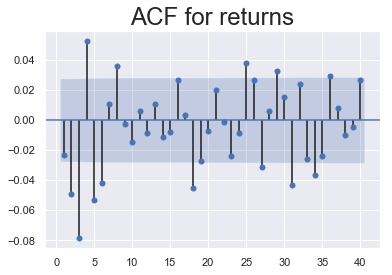

In [9]:
sgt.plot_acf(df.returns,zero=False,lags=40)
plt.title("ACF for returns", size=24);

In [10]:
model_ret_ma_1=ARMA(df.returns, order=(0,1))
results_ret_ma_1=model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 12 May 2020   AIC                          15865.190
Time:                        17:30:08   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
model_ret_ma_2=ARMA(df.returns, order=(0,2))
results_ret_ma_2=model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 12 May 2020   AIC                          15853.728
Time:                        17:32:19   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
LLR_test2(results_ret_ma_1.llf, results_ret_ma_2.llf, 1)

0.0

In [19]:
model_ret_ma_6=ARMA(df.returns, order=(0,6))
results_ret_ma_6=model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 12 May 2020   AIC                          15794.442
Time:                        17:35:34   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [20]:
model_ret_ma_7=ARMA(df.returns, order=(0,7))
results_ret_ma_7=model_ret_ma_7.fit()
LLR_test2(results_ret_ma_6.llf, results_ret_ma_7.llf, 1)

0.554

Turns out 8th order is better

In [22]:
model_ret_ma_8=ARMA(df.returns, order=(0,8))
results_ret_ma_8=model_ret_ma_8.fit()

Text(0.5, 1.0, 'Residuals for Ma returns')

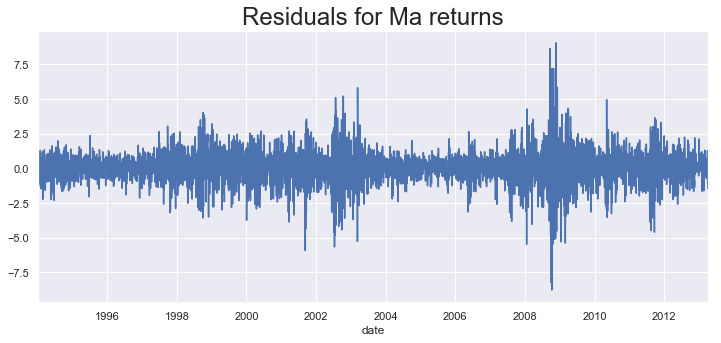

In [25]:
df['res_ret_ma_8']=results_ret_ma_8.resid
df.res_ret_ma_8.plot(figsize=(12,5))
plt.title('Residuals for Ma returns', size=24)

In [26]:
np.sqrt(df.res_ret_ma_8.var())

1.1641540584480015

In [27]:
sts.adfuller(df.res_ret_ma_8)

(-70.83822003408629,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.881920221938)

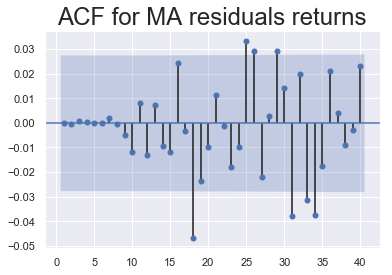

In [28]:
sgt.plot_acf(df.res_ret_ma_8,zero=False,lags=40)
plt.title("ACF for MA residuals returns", size=24);

Some are significant so it's not  a white noise